In [424]:
import StrategyLearner as sl
import pandas as pd
import datetime as dt
import marketsimcode
from marketsimcode import compute_portvals
import matplotlib.pyplot as plt
import importlib
import ManualStrategy as ms
importlib.reload(sl)
importlib.reload(marketsimcode)
importlib.reload(ms)

<module 'ManualStrategy' from '/Users/mengw/Documents/OMSCS/CS7646/ML4T_2021Fall/strategy_evaluation/ManualStrategy.py'>

In [384]:
impact = 0.005
learner = sl.StrategyLearner(verbose = False, impact = impact, commission=10) # constructor 
learner.add_evidence(symbol = 'JPM', sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,12,31), sv = 100000)

cr: -0.783783467637118
cr: 0.8559370938393548
cr: 2.376610345723944
cr: 5.111736417988042
cr: 5.6371861190538
cr: 5.469081102157521
cr: 6.3788042630621185
cr: 6.1923472835976
cr: 6.522887964647769
cr: 6.586589550298925
cr: 6.579548999220162
cr: 6.565580972186112
cr: 6.565580972186112


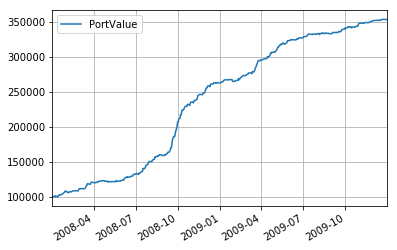

In [400]:
df_trades_sl = learner.testPolicy(symbol = 'JPM', sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,12,31), sv = 100000)
df_portval_sl = compute_portvals(df_trades_sl, impact=impact, commission=9.95)
df_portval_sl.plot(grid=True)

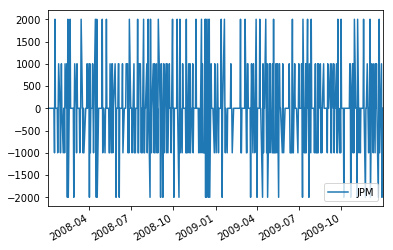

In [327]:
df_trades_sl.plot()

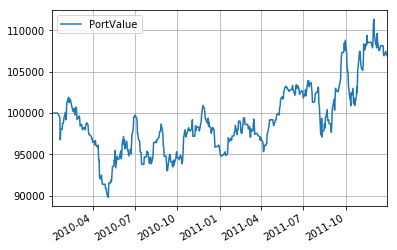

In [328]:
df_trades_sl_test = learner.testPolicy(symbol = 'JPM', sd=dt.datetime(2010,1,1), ed=dt.datetime(2011,12,31), sv = 100000)
df_portval_sl_test = compute_portvals(df_trades_sl_test)
df_portval_sl_test.plot(grid=True)

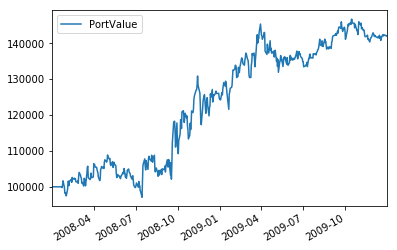

In [425]:
df_trades_ms = ms.testPolicy(symbol = 'JPM', sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,12,31), sv = 100000)
df_portval_ms = compute_portvals(df_trades_ms, commission=9.95, impact=0.005)
df_portval_ms.plot()

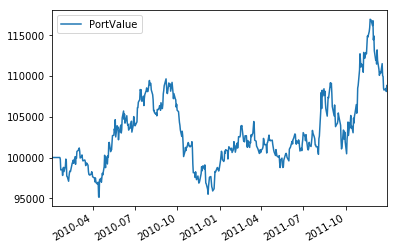

In [426]:
df_trades_ms_test = ms.testPolicy(symbol = 'JPM', sd=dt.datetime(2010,1,1), ed=dt.datetime(2011,12,31), sv = 100000)
df_portval_ms_test = compute_portvals(df_trades_ms_test, commission=9.95, impact=0.005)
df_portval_ms_test.plot()

In [138]:
df_trades_bm = pd.DataFrame(0, index=df_trades_sl.index, columns=df_trades_sl.columns)
df_trades_bm.iloc[0] = 1000
df_portval_bm = compute_portvals(df_trades_bm, commission=9.95, impact=0.005)

In [401]:
df_compare = pd.DataFrame(index=df_portval_sl.index, columns=['SL', 'MS', 'BENCHMARK'])
df_compare.SL = df_portval_sl / df_portval_sl.iloc[0]
df_compare.MS = df_portval_ms / df_portval_ms.iloc[0]
df_compare.BENCHMARK = df_portval_bm / df_portval_bm.iloc[0]

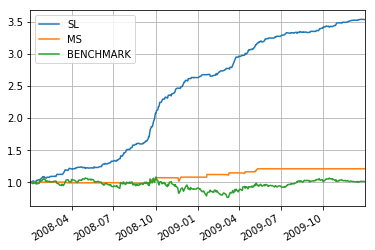

In [402]:
df_compare.plot(grid=True)

cr: 0.9701065765531597
cr: 2.693267481154156
cr: 3.869248765271652
cr: 6.361840395113062
cr: 6.899402131531052
cr: 7.012997140629048
cr: 7.742916558357144
cr: 7.49207174421626
cr: 7.8208994021315155
cr: 7.861190538081606
cr: 7.8619703665193486
cr: -0.783783467637118
cr: 0.8559370938393548
cr: 2.376610345723944
cr: 5.111736417988042
cr: 5.6371861190538
cr: 5.469081102157521
cr: 6.3788042630621185
cr: 6.1923472835976
cr: 6.522887964647769
cr: 6.586589550298925
cr: 6.579548999220162
cr: 6.565580972186112
cr: 6.565580972186112
cr: -17.309344944112294
cr: -16.670431505068905
cr: -14.30707044450221
cr: -10.715986482973742
cr: -10.076020275539394
cr: -9.942786586950877
cr: -10.562048349363147
cr: -8.612542240707048
cr: -7.869482713802965
cr: -8.719742656615542
cr: -7.55904600987783
cr: -5.245892903561219
cr: -6.655614764751758
cr: -6.796646737717702
cr: -5.56124252664414
cr: -4.542435664153888
cr: -4.974395632960748
cr: -4.0294255263841965
cr: -2.6448011437483756
cr: -2.9279178580712246
cr: -

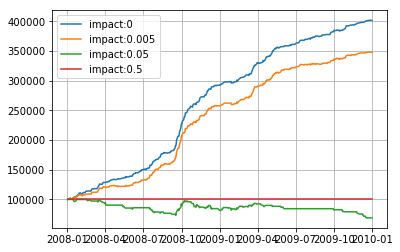

In [373]:
for i in (0, 0.005, 0.05, 0.5):
    learner = sl.StrategyLearner(verbose = False, impact = i, commission=10) # constructor 
    learner.add_evidence(symbol = 'JPM', sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,12,31), sv = 100000)
    df_trades_sl = learner.testPolicy(symbol = 'JPM', sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,12,31), sv = 100000)
    df_portval_sl = compute_portvals(df_trades_sl, impact=i, commission=10)
    plt.plot(df_portval_sl, label=f'impact:{i}')
plt.grid()
plt.legend()
plt.show()

In [390]:
df_trades_ms = ms.testPolicy(symbol = 'JPM', sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,12,31), sv = 100000)
df_portval_ms = compute_portvals(df_trades_ms, commission=9.95, impact=0.005)

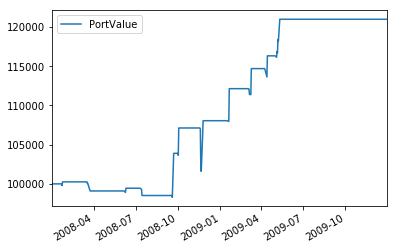

In [394]:
df_portval_ms.plot()

In [415]:
df_portval_sl.shift(1)

,PortValue
2008-01-02,NaN
2008-01-03,99797.70
2008-01-04,100067.70
2008-01-07,100937.70
2008-01-08,100557.70
2008-01-09,102057.70
2008-01-10,101547.70
2008-01-11,100567.70
2008-01-14,100997.70
2008-01-15,100537.70


In [431]:
(df_trades_sl != 0).sum()[0]

289

In [450]:
date = df_trades_ms.index[15]
df_trades_ms.loc[date - pd.DateOffset(1)] 

In [455]:
df_trades_ms.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=505, freq=None)

In [463]:
date = df_trades_ms.index[14]
df_trades_ms.loc[date][0]

-1000.0

In [464]:
df_tr

Timestamp('2008-01-23 00:00:00')

In [467]:
type(df_portval_ms.sum(axis=1))

pandas.core.series.Series

In [468]:
type(df_portval_ms)

pandas.core.frame.DataFrame

In [471]:
(df_trades_bm != 0).sum()

JPM    1
dtype: int64

In [472]:
df_cash = pd.DataFrame(0, index=df_trades_bm.index, columns=df_trades_bm.columns, dtype='float')

In [474]:
df_cash[df_trades_bm != 0] -= 10

In [477]:
from marketsimcode import compute_portvals

In [488]:
port_val = compute_portvals(df_trades_bm, commission=9.95)
port_val

,PortValue
2008-01-02,99990.05
2008-01-03,99720.05
2008-01-04,98850.05
2008-01-07,99230.05
2008-01-08,97730.05
2008-01-09,98240.05
2008-01-10,99220.05
2008-01-11,98790.05
2008-01-14,99250.05
2008-01-15,97250.05


In [491]:
df_trades_bm

,JPM
2008-01-02,1000
2008-01-03,0
2008-01-04,0
2008-01-07,0
2008-01-08,0
2008-01-09,0
2008-01-10,0
2008-01-11,0
2008-01-14,0
2008-01-15,0
